#### Preprocessing

In [9]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Audio
import scipy.io.wavfile
Fs, y = scipy.io.wavfile.read('train_bird.wav')
Audio(y, rate=Fs)

In [52]:
def plot_components(n, data, part):
    plt.rcParams["figure.figsize"] = (20,4)
    
    #Extract the Fourier coefficients
    F = fft(data)/N 
    
    #plot the data/DFT
    if (part == 0):
        plt.subplot(1, 2, 1)
        plt.plot(data.real)
        plt.title('Original signal of train_bird.wav')
        # plt.ylim(-np.max(abs(data.real)), np.max(abs(data.real))) #set the plot range to the max of data values

        plt.subplot(1, 2, 2)
        plt.plot(n, np.absolute(F.real))
        plt.title('DFT magnitudes of original signal')
        plt.ylim(-1, np.max(abs(F.real))) #set the plot range to the max of data values
    
    # bird testing (high)
    elif (part == 1):
        freq = ifft(data)/N
        plt.subplot(1, 2, 1)
        plt.plot(n, freq)
        plt.title('Filtered bird time-domain')
        # plt.ylim(0, np.max(abs(freq))) #set the plot range to the max of data values
    
        plt.subplot(1, 2, 2)
        plt.plot(np.abs(data.real))
        plt.title('Magnitude of filtered bird frequency-domain')
        # plt.ylim(-np.max(abs(data.real)), np.max(abs(data.real))) #set the plot range to the max of data values
        
    # train testing (low)
    elif (part == 2):
        freq = ifft(data)/N
        plt.subplot(1, 2, 1)
        plt.plot(n, freq)
        plt.title('Filtered train time-domain')
        # plt.ylim(0, np.max(abs(freq))) #set the plot range to the max of data values
    
        plt.subplot(1, 2, 2)
        plt.plot(np.abs(data.real))
        plt.title('Magnitude of filtered train frequency-domain')
        # plt.ylim(-np.max(abs(data.real)), np.max(abs(data.real))) #set the plot range to the max of data values
   
    plt.show()

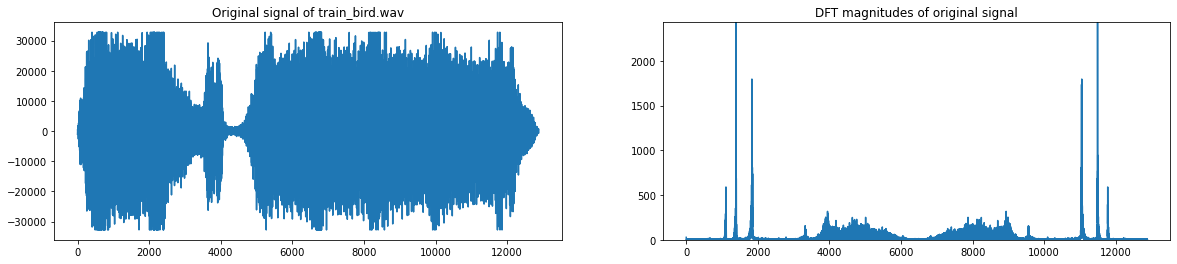

In [53]:
N = len(y)
n = np.linspace(0, N-1, num=N)
# t = np.arange(0, N/Fs, 1/Fs);

plot_components(n,y,0)


the lowpass filter chosen is  3440.0


C:\Users\anneg\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


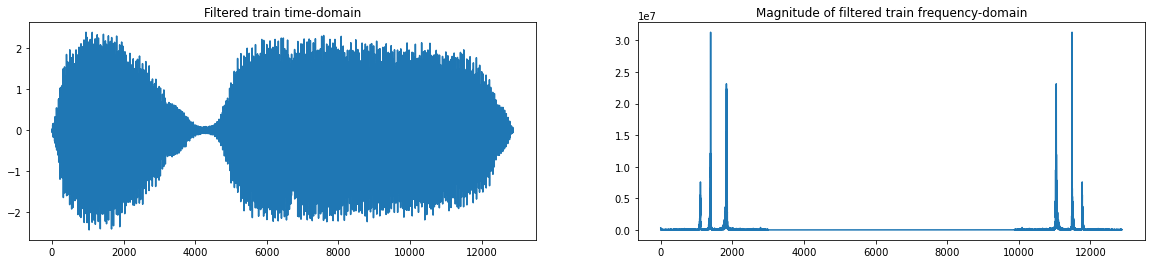

C:\Users\anneg\anaconda3\lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [65]:
lowpass_filter = N/2 - 3000
x_train = fft(y)
for i in range(N):
    if (np.abs(N/2 - i) < lowpass_filter):
        x_train[i] = 0
filtered_train = ifft(x_train)
print("the lowpass filter chosen is ", lowpass_filter)
plot_components(n, x_train, 2)
Audio(filtered_train, rate=Fs)

C:\Users\anneg\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


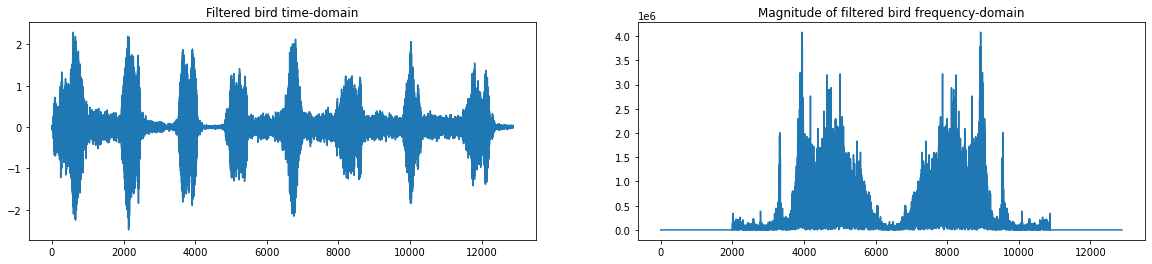

C:\Users\anneg\anaconda3\lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [59]:
x_bird = fft(y)
for i in range(N):
    if (np.abs(N/2 - i) > lowpass_filter):
        x_bird[i] = 0
filtered_bird = ifft(x_bird)
plot_components(n, x_bird, 1)
Audio(filtered_bird, rate=Fs)